In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [13]:
df = pd.read_csv("transformed_data/merged_data_1.csv", index_col="id")
df.head(10)

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,...,longitude,latitude,city,day_type,district,state,country_code,country_name,Crime_Index,Safety_Index
id,,,,,,,,,,,,,,,,,,,,,
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,4.90569,52.41772,Amsterdam,weekday,Gemeente Landsmeer,North Holland,NL,Netherlands,25.7,74.3
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,4.90005,52.37432,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,4.97512,52.36103,Amsterdam,weekday,Gemeente Diemen,North Holland,NL,Netherlands,25.7,74.3
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,4.89417,52.37663,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,4.90051,52.37508,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
5,552.808567,Private room,False,True,3.0,False,0,0,8.0,100.0,...,4.87699,52.38966,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
6,215.124317,Private room,False,True,2.0,False,0,0,10.0,94.0,...,4.91570,52.38296,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
7,2771.307384,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,...,4.88467,52.38749,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3
8,1001.804420,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,...,4.86459,52.40175,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3


In [14]:
cities = df['city'].unique().tolist()

In [15]:
chrome_options = Options()
# chrome_options.add_argument("--headless")
service = ChromeService(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

data = []

for city in cities:
  driver.get(f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR")

  ''' WE can use this Method or just modify the URL with the Currency Type '''
  # dropdown_element = driver.find_element(By.ID,"displayCurrency")
  # select = Select(dropdown_element)
  # select.select_by_visible_text("EGP")

  wait = WebDriverWait(driver, 15)

  Meal_at_Inexpensive_Restaurant = wait.until(
      EC.presence_of_element_located((
          By.XPATH,"/html/body/div[2]/table/tbody/tr[2]/td[2]/span"
          ))).text
  Monthly_Average_Net_salary = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[73]/td[2]/span").text
  Taxi_one_mile = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[36]/td[2]/span").text
  Monthly_Basic_Utilities = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[43]/td[2]/span").text
  Monthly_Rent_One_Bedroom_CC = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[63]/td[2]/span").text
  Monthly_Rent_Three_Bedroom_CC = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[65]/td[2]/span").text
  Monthly_Rent_One_Bedroom_OCC = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[64]/td[2]/span").text
  Monthly_Rent_Three_Bedroom_OCC = driver.find_element(By.XPATH, "/html/body/div[2]/table/tbody/tr[66]/td[2]/span").text
  

  data.append({
    "city": city,
    "Monthly_Average_Net_salary": Monthly_Average_Net_salary,
    "Meal_at_Inexpensive_Restaurant": Meal_at_Inexpensive_Restaurant,
    "Taxi_one_mile": Taxi_one_mile,
    "Monthly_Basic_Utilities": Monthly_Basic_Utilities,
    "Monthly_Rent_One_Bedroom_CC" : Monthly_Rent_One_Bedroom_CC,
    "Monthly_Rent_One_Bedroom_OCC" : Monthly_Rent_One_Bedroom_OCC,
    "Monthly_Rent_Three_Bedroom_CC" : Monthly_Rent_Three_Bedroom_CC,
    "Monthly_Rent_Three_Bedroom_OCC" : Monthly_Rent_Three_Bedroom_OCC,
    })

driver.quit()

In [16]:
city_data_df = pd.DataFrame(data)
city_data_df

,city,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_one_mile,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC
0,Amsterdam,"4,502.10 €",20.50 €,3.00 €,262.00 €,"2,178.68 €","1,701.26 €","3,725.50 €","2,785.29 €"
1,Athens,"1,164.49 €",15.00 €,0.95 €,184.56 €,614.42 €,519.21 €,"1,142.70 €",946.39 €
2,Barcelona,"2,102.82 €",15.00 €,1.86 €,159.12 €,"1,398.59 €","1,061.18 €","2,162.90 €","1,684.62 €"
3,Berlin,"3,136.14 €",15.00 €,2.80 €,347.11 €,"1,298.45 €",923.15 €,"2,431.82 €","1,770.45 €"
4,Budapest,"1,410.60 €",10.47 €,1.15 €,134.93 €,733.71 €,557.83 €,"1,412.20 €","1,047.05 €"
5,Lisbon,"1,304.65 €",13.75 €,0.90 €,137.93 €,"1,387.50 €","1,036.00 €","2,502.27 €","1,633.33 €"
6,London,"4,260.76 €",23.01 €,2.85 €,333.23 €,"2,788.44 €","2,029.85 €","4,402.56 €","3,416.39 €"
7,Paris,"3,305.14 €",15.00 €,1.50 €,238.30 €,"1,394.79 €","1,039.17 €","3,088.46 €","2,145.00 €"
8,Rome,"1,863.90 €",15.00 €,1.50 €,187.37 €,"1,280.45 €",820.59 €,"2,353.33 €","1,541.67 €"
9,Vienna,"3,135.20 €",18.25 €,1.90 €,291.20 €,"1,082.80 €",763.71 €,"2,063.57 €","1,302.78 €"


In [17]:
currency_cols = [
    "Monthly_Average_Net_salary",
    "Meal_at_Inexpensive_Restaurant",
    "Taxi_one_mile",
    "Monthly_Basic_Utilities",
    "Monthly_Rent_One_Bedroom_CC",
    "Monthly_Rent_One_Bedroom_OCC",
    "Monthly_Rent_Three_Bedroom_CC",
    "Monthly_Rent_Three_Bedroom_OCC"
]

def clean_currency(series):
    return (
        series
        .str.replace('\xa0', '', regex=False)   # remove non-breaking space
        .str.replace('€', '', regex=False)      # remove euro sign
        .str.replace(',', '', regex=False)      # remove thousands separator
        .str.strip()
        .astype(float)
    )

city_data_df[currency_cols] = city_data_df[currency_cols].apply(clean_currency)


In [18]:
city_data_df = city_data_df.rename(columns={"Taxi_one_mile": "Taxi_price_per_Km"})

In [19]:
city_data_df

,city,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC
0,Amsterdam,4502.10,20.50,3.00,262.00,2178.68,1701.26,3725.50,2785.29
1,Athens,1164.49,15.00,0.95,184.56,614.42,519.21,1142.70,946.39
2,Barcelona,2102.82,15.00,1.86,159.12,1398.59,1061.18,2162.90,1684.62
3,Berlin,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45
4,Budapest,1410.60,10.47,1.15,134.93,733.71,557.83,1412.20,1047.05
5,Lisbon,1304.65,13.75,0.90,137.93,1387.50,1036.00,2502.27,1633.33
6,London,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39
7,Paris,3305.14,15.00,1.50,238.30,1394.79,1039.17,3088.46,2145.00
8,Rome,1863.90,15.00,1.50,187.37,1280.45,820.59,2353.33,1541.67
9,Vienna,3135.20,18.25,1.90,291.20,1082.80,763.71,2063.57,1302.78


In [20]:
city_data_df.to_csv("External_data/cost_of_living_per_city.csv", index = False)

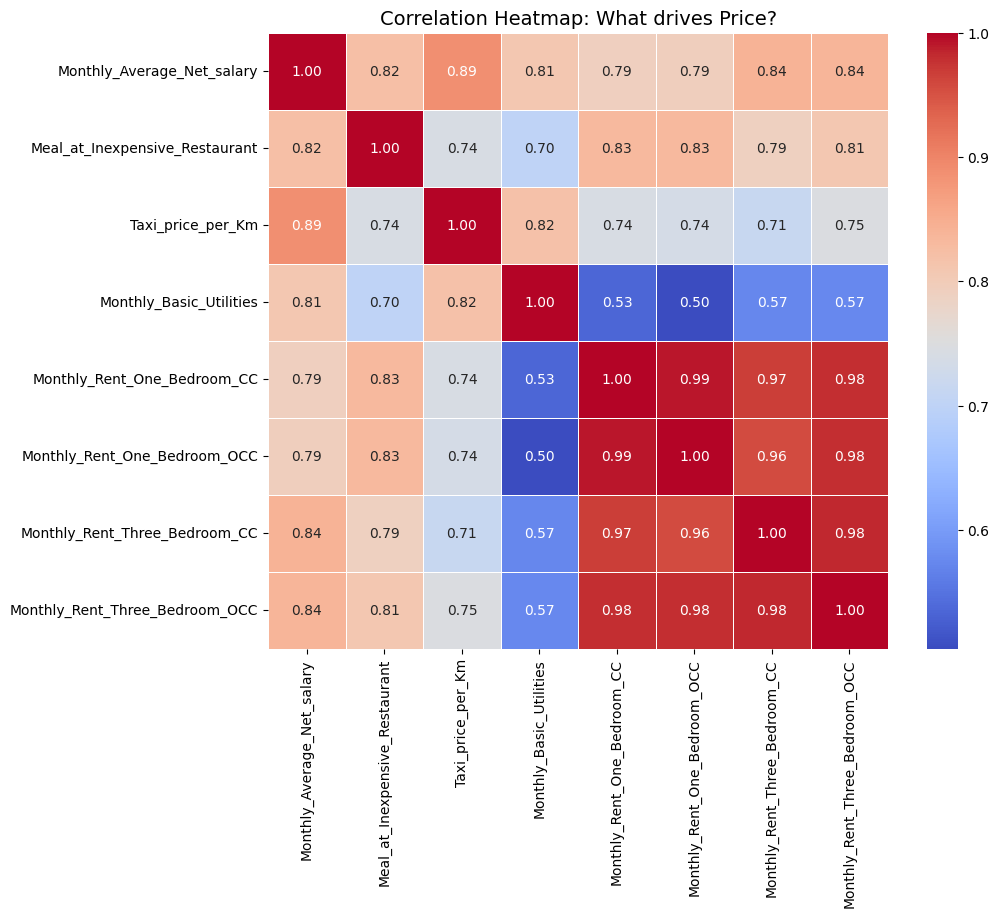

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

currency_cols = [
    "Monthly_Average_Net_salary",
    "Meal_at_Inexpensive_Restaurant",
    "Taxi_price_per_Km",
    "Monthly_Basic_Utilities",
    "Monthly_Rent_One_Bedroom_CC",
    "Monthly_Rent_One_Bedroom_OCC",
    "Monthly_Rent_Three_Bedroom_CC",
    "Monthly_Rent_Three_Bedroom_OCC"
]


plt.figure(figsize=(10, 8))
sns.heatmap(city_data_df[currency_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: What drives Price?', fontsize=14)
plt.show()